<a href="https://colab.research.google.com/github/jeffveleze/fashion_mnist_tensorflow/blob/master/fmnist_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST: Clothes Image Classification

## Importar libraries

In [0]:
!pip install tensorflow==2.0

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

# Helper libraries.
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(["ggplot", "seaborn-ticks"])

# Verifying tensorflow version
print("TensorFlow version: {}.".format(tf.__version__))

TensorFlow version: 2.0.0.


## Loading Fashion MNIST Data 

In [0]:
# Fashion mnist dataset can be loaded directly from keras datasets
fashion_mnist = keras.datasets.fashion_mnist

# Splitting the data into train-test images/labels.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# There are 10 existent type of images in this dataset
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [5]:
# These are the labels of the dataset
# https://github.com/zalandoresearch/fashion-mnist#labels

# Creating the classes list based on the dataset labels 
CLASSES = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
           "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Verifying it's correct
for i in range(len(CLASSES)):
  print("Label: {} --> Class: {}.".format(i, CLASSES[i]))

Label: 0 --> Class: T-shirt/top.
Label: 1 --> Class: Trouser.
Label: 2 --> Class: Pullover.
Label: 3 --> Class: Dress.
Label: 4 --> Class: Coat.
Label: 5 --> Class: Sandal.
Label: 6 --> Class: Shirt.
Label: 7 --> Class: Sneaker.
Label: 8 --> Class: Bag.
Label: 9 --> Class: Ankle boot.


## Exploring Data

In [0]:
# All the values in the matrixes go from 0 to 255. Checking for first image
train_images[0]

In [7]:
# All the images in this dataset are already scaled to 28x28 pixels
print("train_images shape: {}.".format(train_images.shape))
print("train_labels shape: {}.".format(train_labels.shape))

train_images shape: (60000, 28, 28).
train_labels shape: (60000,).


In [8]:
print("test_images shape: {}.".format(test_images.shape))
print("test_labels shape: {}.".format(test_labels.shape))

test_images shape: (10000, 28, 28).
test_labels shape: (10000,).


## Preprocessing data

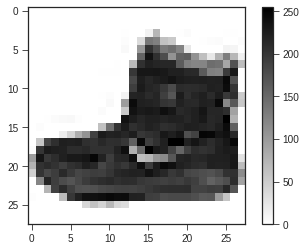

In [9]:
# Creting figure to display first train image
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)

# Adding a colorbar
plt.colorbar()

# Avoiding grid
plt.grid(False)

# Display image
plt.show()

In [0]:
# As biggest number in matrixes is 255, by diving all the values by 255 we
# get to have all values between 0 and 1, we do this for train and test
train_images = train_images / 255.0
test_images = test_images / 255.0

## Visualizing first 25 train images with its respective class

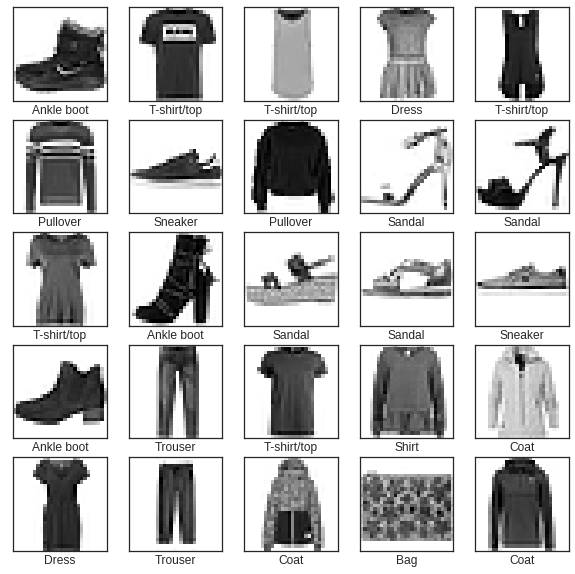

In [11]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(CLASSES[train_labels[i]])
    
plt.show()

## Creating Models

### Sequential API

In [0]:
# Define hyperparams dictionary
hyperparams = {'dense_units': 64, 
               'activation': 'relu', 
               'dropout': 0.3}

In [0]:
# Creating a function which takes a dictionary with all the hyperparameters
# to be able to try different model configurations
def get_sequential_model(hyperparams):

  # Creating the model
  # Input layer has 28x28 units
  # Dense layer has hyperparams["dense_units"] units
  # Output layer has 10 units
  sequential_model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(units=hyperparams["dense_units"], activation=hyperparams["activation"]),
      keras.layers.Dense(units=10, activation="softmax")
  ])

  return sequential_model

In [0]:
# Creating model with function
sequential_model = get_sequential_model(hyperparams)

In [15]:
sequential_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### Functional API

In [0]:
# Creating a function which takes a dictionary with all the hyperparameters
# to be able to try different model configurations
def get_functional_model(hyperparams):

  # Creating the model
  # Input layer has 28x28 units
  # Dense layer has hyperparams["dense_units"] units
  # Output layer has 10 units
  inputs = Input(shape=(28, 28))
  flattered_inputs = Flatten()(inputs)
  dense_layer = Dense(units=hyperparams["dense_units"], activation=hyperparams["activation"])(flattered_inputs)
  outputs = Dense(units=10, activation="softmax")(dense_layer)
  functional_model = Model(inputs=inputs, outputs=outputs)
  
  return functional_model

In [0]:
# Change the model type as desired between "sequential" and "functional".
MODEL_TYPE = "functional"

In [0]:
# Creating function which returns a model according to MODEL_TYPE value
def get_model(hyperparams = hyperparams):
  if MODEL_TYPE == "sequential":
    model = get_sequential_model(hyperparams=hyperparams)
  else:
    model = get_functional_model(hyperparams=hyperparams)

  return model

In [0]:
# Getting a functional model
functional_model = get_model()

In [20]:
functional_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## Compiling models

In [0]:
# Selecting an optimizator
optimizer = 'adam' 

# Selecting cost function
loss_function = 'sparse_categorical_crossentropy'

# Selecting metrics list
metrics_list = ['accuracy']

# Compiling models

sequential_model.compile(optimizer=optimizer, 
              loss=loss_function, 
              metrics=metrics_list)

functional_model.compile(optimizer=optimizer,
              loss=loss_function,
              metrics=metrics_list)

## Training models

In [0]:
# Defining batch_size
batch_size = 32

# Defining epochs
epochs = 10

# Defining validation data as 15% of total train data
validation_split = 0.15

In [23]:
# Training sequential model
sequential_model_history = sequential_model.fit(x=train_images, 
                                                y=train_labels, 
                                                batch_size=batch_size, 
                                                epochs=epochs, 
                                                validation_split=validation_split)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 4s 82us/sample - loss: 0.5300 - accuracy: 0.8161 - val_loss: 0.4324 - val_accuracy: 0.8431
Epoch 2/10
51000/51000 [==============================] - 4s 74us/sample - loss: 0.4034 - accuracy: 0.8569 - val_loss: 0.3921 - val_accuracy: 0.8607
Epoch 3/10
51000/51000 [==============================] - 4s 72us/sample - loss: 0.3642 - accuracy: 0.8680 - val_loss: 0.3725 - val_accuracy: 0.8697
Epoch 4/10
51000/51000 [==============================] - 4s 74us/sample - loss: 0.3381 - accuracy: 0.8777 - val_loss: 0.3802 - val_accuracy: 0.8640
Epoch 5/10
51000/51000 [==============================] - 4s 71us/sample - loss: 0.3188 - accuracy: 0.8839 - val_loss: 0.3427 - val_accuracy: 0.8806
Epoch 6/10
51000/51000 [==============================] - 3s 68us/sample - loss: 0.3074 - accuracy: 0.8864 - val_loss: 0.3421 - val_accuracy: 0.8789
Epoch 7/10
51000/51000 [==============================] -

In [24]:
# Training functional model
functional_model_history = sequential_model.fit(x=train_images, 
                                                y=train_labels, 
                                                batch_size=batch_size, 
                                                epochs=epochs, 
                                                validation_split=validation_split)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 3s 67us/sample - loss: 0.2628 - accuracy: 0.9030 - val_loss: 0.3433 - val_accuracy: 0.8786
Epoch 2/10
51000/51000 [==============================] - 3s 67us/sample - loss: 0.2534 - accuracy: 0.9071 - val_loss: 0.3373 - val_accuracy: 0.8827
Epoch 3/10
51000/51000 [==============================] - 3s 68us/sample - loss: 0.2476 - accuracy: 0.9088 - val_loss: 0.3270 - val_accuracy: 0.8850
Epoch 4/10
51000/51000 [==============================] - 3s 67us/sample - loss: 0.2409 - accuracy: 0.9105 - val_loss: 0.3348 - val_accuracy: 0.8838
Epoch 5/10
51000/51000 [==============================] - 3s 67us/sample - loss: 0.2372 - accuracy: 0.9112 - val_loss: 0.3578 - val_accuracy: 0.8801
Epoch 6/10
51000/51000 [==============================] - 3s 66us/sample - loss: 0.2314 - accuracy: 0.9141 - val_loss: 0.3478 - val_accuracy: 0.8816
Epoch 7/10
51000/51000 [==============================] -

## Training curves (Sequential Model)

In [25]:
# The sequential_model_history.history["loss"] entry is a list with as many 
# values as epochs the model was trained on.
epochs = len(sequential_model_history.history["loss"])  
xticks = list(range(epochs))

# The xticklabels are modified for the sake of understanding because the first 
# epoch is called Epoch 1, not Epoch 0.
xticklabels = [xtick + 1 for xtick in xticks]
print("xticks:")
print(xticks)
print("xticklabels:")
print(xticklabels)

xticks:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
xticklabels:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### Cost

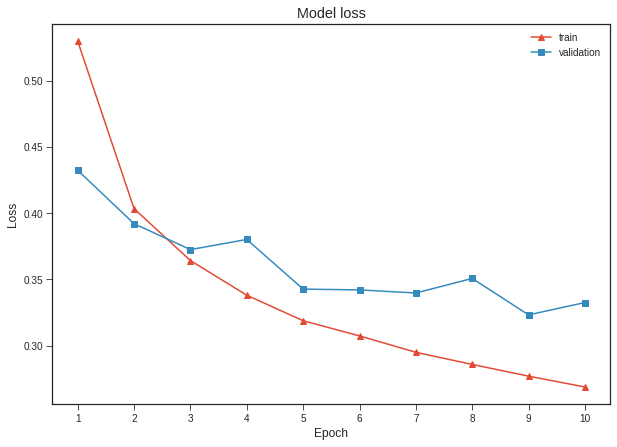

In [26]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(sequential_model_history.history["loss"], marker='^')
ax.plot(sequential_model_history.history["val_loss"], marker='s')
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
plt.legend(["train", "validation"], loc="upper right")
plt.show()

### Accuracy

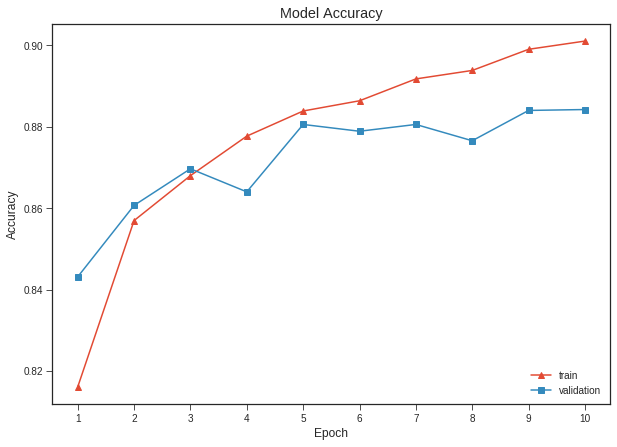

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(sequential_model_history.history["accuracy"], marker='^')
ax.plot(sequential_model_history.history["val_accuracy"], marker='s')

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
plt.legend(["train", "validation"], loc="lower right")
plt.show()

## Tuning Hyperparameters

In [28]:
# Recalling model type to indicate that i'm using a functional model
MODEL_TYPE = "functional"

# Defining initial empty values
best_performance = 0.0
best_hyperparameters = dict()
best_model = None
best_history = None

# Defining hyperpameters
batch_sizes = [32, 64]
dense_units_list = [128, 256]
total_models = len(batch_sizes) * len(dense_units_list)
tried_models = 0

# Looping batch sizes and dense unit lists 
for batch_size in batch_sizes:
  for dense_units in dense_units_list:

    # Creating hyperparams dictionary
    hyperparams = {"batch_size": batch_size, 
                   "dense_units": dense_units,
                   "activation": "relu",
                   "dropout": 0.3}

    print("Hyperparameters for this model: {}.".format(hyperparams))

    # Creating model
    model = get_model(hyperparams=hyperparams)

    # Compiling model
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    # Getting history
    history = model.fit(x=train_images, y=train_labels, 
                        batch_size=hyperparams["batch_size"], 
                        epochs=10, 
                        validation_split=0.15)
    
    # The last value in the list is the achieved validation accuracy at the end 
    # of the training.
    val_acc = history.history["val_accuracy"][-1]
    
    # Updating best values results
    if val_acc > best_performance:
      best_performance = val_acc
      best_hyperparameters = hyperparams
      best_model = model
      best_model_history = history
    
    tried_models += 1

    print("\nCurrent best model performance: {}.".format(best_performance))
    print("Current best hyperparameters: {}.".format(best_hyperparameters))
    print("Tried models = {}/{}.\n".format(tried_models, total_models))

print("Best model performance: {}.".format(best_performance))
print("Hyperparameters used: {}.".format(best_hyperparameters))

Hyperparameters for this model: {'batch_size': 32, 'dense_units': 128, 'activation': 'relu', 'dropout': 0.3}.
Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 4s 80us/sample - loss: 0.5136 - accuracy: 0.8205 - val_loss: 0.4136 - val_accuracy: 0.8534
Epoch 2/10
51000/51000 [==============================] - 4s 73us/sample - loss: 0.3796 - accuracy: 0.8630 - val_loss: 0.3918 - val_accuracy: 0.8573
Epoch 3/10
51000/51000 [==============================] - 4s 73us/sample - loss: 0.3409 - accuracy: 0.8763 - val_loss: 0.3554 - val_accuracy: 0.8717
Epoch 4/10
51000/51000 [==============================] - 4s 71us/sample - loss: 0.3155 - accuracy: 0.8854 - val_loss: 0.3481 - val_accuracy: 0.8782
Epoch 5/10
51000/51000 [==============================] - 4s 73us/sample - loss: 0.2994 - accuracy: 0.8891 - val_loss: 0.3348 - val_accuracy: 0.8811
Epoch 6/10
51000/51000 [==============================] - 4s 72us/sample - loss: 0.2822 - accura

## Saving and Loading Model

In [0]:
# Defining path to save model
MODEL_PATH = "fmnist_model.h5"

# Save model
best_model.save(MODEL_PATH)

In [0]:
# Load model back
loaded_model = keras.models.load_model(MODEL_PATH)

In [0]:
# Check that the loaded model summary is the same as the saved one's.
print("Model in memory:\n")
best_model.summary()

print("\nRestored model:\n")
loaded_model.summary()

Model in memory:

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________

Restored model:

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28)]          0         


## Evaluating Model Accuracy

In [29]:
# Evaluate recent functional model created with test data
test_loss, test_acc = best_model.evaluate(x=test_images, 
                                          y=test_labels, 
                                          batch_size=32)

print("Test accuracy (model in memory): {}".format(test_acc))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
# Evaluate recent loaded model with test data to make sure it shows same result
test_loss, test_acc = loaded_model.evaluate(x=test_images, 
                                            y=test_labels, 
                                            batch_size=32)

print("Test accuracy (restored model): {}".format(test_acc))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Predicting



#### Sequential Model

In [0]:
# Predicting with sequential model
sequential_model_predictions = sequential_model.predict(x=test_images)

In [32]:
# Selecting a random image number
image_number_seq = 0

# Get label for image_number_seq in test labels
label_for_image_seq = test_labels[image_number_seq]

# Get class name for label_for_image
class_for_image_seq = CLASSES[label_for_image_seq]

print("Prediction for image {} should be Class: {}, Label: {}" 
      .format(image_number_seq, class_for_image_seq, label_for_image_seq))

Prediction for image 0 should be Class: Ankle boot, Label: 9


In [0]:
# Get predicted image for image_number_seq
predictions_for_image_seq = sequential_model_predictions[image_number_seq]
print(predictions_for_image_seq)

[4.1699288e-08 2.0440652e-10 1.1486141e-08 1.9616039e-07 4.6833921e-07
 1.2710866e-05 1.5975927e-06 9.5587280e-03 4.4584411e-08 9.9042624e-01]


In [0]:
# Determine which is the biggest probability in predictions_for_image_seq
label_with_highest_probability_seq = np.argmax(predictions_for_image_seq)

# Get the class which corresponds to highest probability
class_with_highest_probability_seq = CLASSES[label_with_highest_probability_seq]

print("The image {} is '{}' and it was predicted as '{}'."
  .format(image_number_seq, class_for_image_seq, class_with_highest_probability_seq))

The image 0 is 'Ankle boot' and it was predicted as 'Ankle boot'.


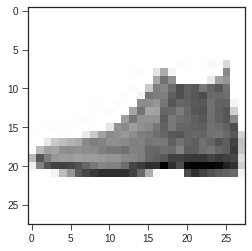

In [0]:
# Plotting test_images[image_number_sec] to make sure it matches 
# with class_with_highest_probability_sec
plt.figure()
plt.imshow(test_images[image_number_seq], cmap=plt.cm.binary)
plt.grid(False)
plt.show()

#### Functional Model

In [0]:
# Predicting with functional model
functional_model_predictions = functional_model.predict(x=test_images)

In [0]:
# Selecting a random image number
image_number_func = 10

# Get label for image_number in test labels
label_for_image_func = test_labels[image_number_func]

# Get class name for label_for_image
class_for_image_func = CLASSES[label_for_image_func]

print("Prediction for image {} should be Class: {}, Label: {}" 
      .format(image_number_func, class_for_image_func, label_for_image_func))

Prediction for image 10 should be Class: Coat, Label: 4


In [0]:
# Get predicted image for image_number_func
predictions_for_image_func = sequential_model_predictions[image_number_func]
print(predictions_for_image_func)

[5.7930715e-04 5.6343862e-07 4.7649965e-02 2.1355705e-10 9.3894500e-01
 2.1279782e-11 1.2658959e-02 6.2378267e-09 1.6611221e-04 1.2453725e-14]


In [0]:
# Determine which is the biggest probability in predictions_for_image_func
label_with_highest_probability_func = np.argmax(predictions_for_image_func)

# Get the class which corresponds to highest probability
class_with_highest_probability_func = CLASSES[label_with_highest_probability_func]

print("The image {} is '{}' and it was predicted as '{}'."
  .format(image_number_func, class_for_image_func, class_with_highest_probability_func))

The image 10 is 'Coat' and it was predicted as 'Coat'.


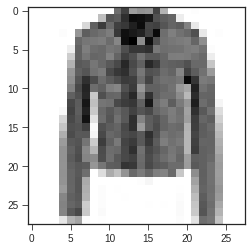

In [0]:
# Plotting test_images[image_number_func] to make sure it matches 
# with class_with_highest_probability_func
plt.figure()
plt.imshow(test_images[image_number_func], cmap=plt.cm.binary)
plt.grid(False)
plt.show()